# Interpolation of data
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [2]:
def expTaylor(x, x0, n):
    t = 0
    for i in range(n+1):
        t = t + np.exp(x0) * (x - x0)**i / np.math.factorial(i)
    return t

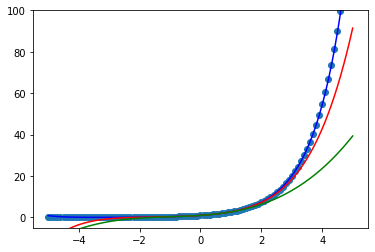

In [3]:
x = np.linspace(-5, 5, 101)

plt.ylim([-5, 100])
plt.scatter(x, np.exp(x))
plt.plot(x, expTaylor(x, 0, 10), 'blue')
plt.plot(x, expTaylor(x, 0, 5), 'red')
plt.plot(x, expTaylor(x, 0, 3), 'green')

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [4]:
def sinTaylor(x, n):
    t = 0
    for i in range(n+1):
        t = t + (-1)**i * x**(2*i+1) / np.math.factorial(2*i+1)
    return t

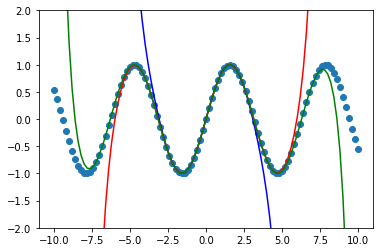

In [5]:
x = np.linspace(-10, 10, 101)
plt.ylim([-2, 2])

plt.scatter(x, np.sin(x))

plt.plot(x, sinTaylor(x, 3), 'blue')
plt.plot(x, sinTaylor(x, 6), 'red')
plt.plot(x, sinTaylor(x, 9), 'green')

- Accuracy of \\( \sin(10.5) \\)

In [6]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [7]:
def derivative(f, x, h):
    return (f(x+h) - f(x)) / h

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [8]:
def nDerivative(f, x, h, n):
    sum = 0
    for k in range(n+1):
        sum = sum + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return sum / h**n

In [9]:
def func(x):
    return 2*np.sin(x)**2 + x
h = 0.1
x = 10.5
print(derivative(func, x, h))
print(nDerivative(func, x, h, 2))
print(func(x))

2.5529969724111723
-2.802754599797907
12.04772926022427


\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

In [10]:
def taylor(func, x, x0, nmax, h):
    t = 0
    for n in range(nmax+1):
        t = t + 1/np.math.factorial(n) * nDerivative(func, x0, h, n) * (x - x0)**n
    return t

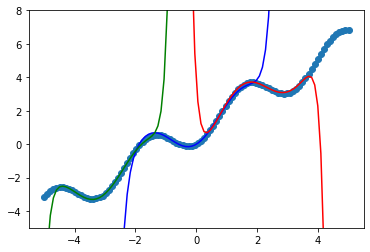

In [11]:
x = np.linspace(-5, 5, 100)
plt.ylim([-5, 8])

nmax = 15
h = 0.05
plt.scatter(x, func(x))
plt.plot(x, taylor(func, x, 0, nmax, h), 'blue') 
plt.plot(x, taylor(func, x, 2, nmax, h), 'red') 
plt.plot(x, taylor(func, x, -3, nmax, h), 'green') 

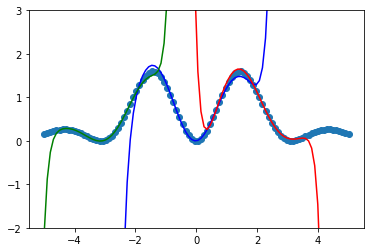

In [12]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

x = np.linspace(-5, 5, 100)
plt.ylim([-2, 3])

nmax = 15
h = 0.05
plt.scatter(x, func(x))
plt.plot(x, taylor(func, x, 0, nmax, h), 'blue') 
plt.plot(x, taylor(func, x, 2, nmax, h), 'red') 
plt.plot(x, taylor(func, x, -3, nmax, h), 'green') 

## 2. Interpolation

### 2.1 Generate data points

In [137]:
def correctFunction(x):
    return -2 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [138]:
npoints = 21
x_list = np.linspace(-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])

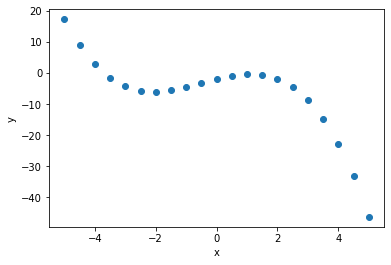

In [139]:
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [140]:
data = np.array([data0[0] + 0.25*(2*np.random.rand(npoints) - 1), data0[1] + 5*(2*np.random.rand(npoints) - 1)])

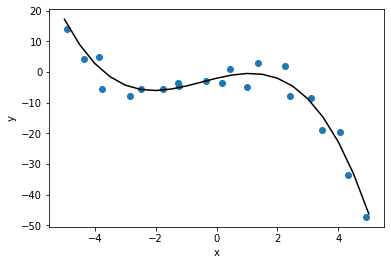

In [141]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

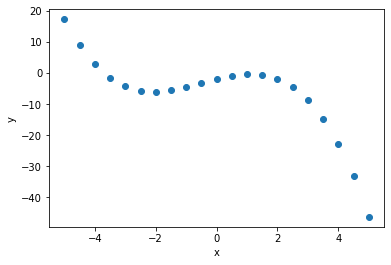

In [142]:
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(data0[0], data0[1])

In [143]:
from scipy import interpolate

- linear splines

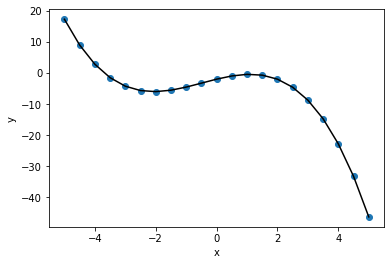

In [144]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind='linear')

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]), 'black')

- zoom

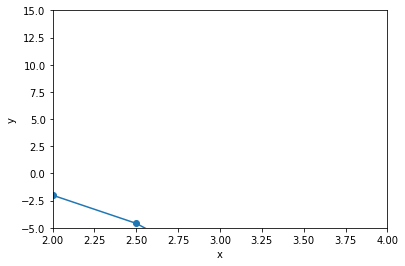

In [145]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2, 4])
plt.ylim([-5, 15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2, 4, 201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

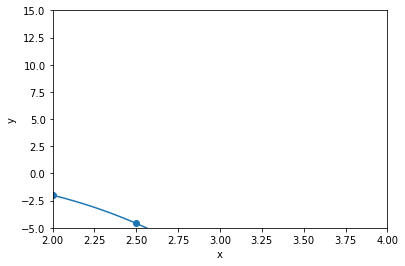

In [146]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind='cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2, 4])
plt.ylim([-5, 15])
plt.scatter(data0[0], data0[1])
x_list = np.linspace(2, 4, 201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

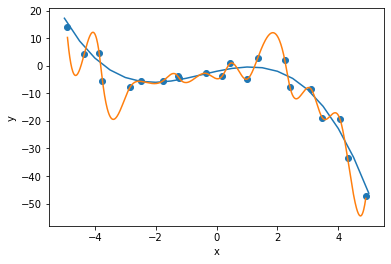

In [147]:
splineCubic = interpolate.interp1d(data[0], data[1], kind='cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.9, 4.9, 901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

- How to handle data which is not smooth?

In [148]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

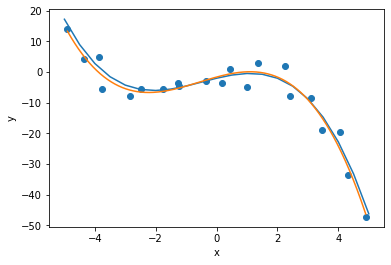

In [149]:
plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.9, 4.9, 901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

In [150]:
datapoly = data[:, 7:14]

In [151]:
def createMat(x_data):
    mat = np.array(np.ones(len(x_data)))
    for i in range(2, len(x_data)+1):
        mat = np.vstack([mat, np.array(x_data**(i-1))])
    return np.transpose(mat)

def createY(a, x):
    t = 0
    for i in range(len(a)):
        t = t + a[i]*x**i
    return t

In [152]:
x_mat = createMat(datapoly[0])
y = datapoly[1,:]

a = np.linalg.solve(x_mat, y)
x_list = np.linspace(-2.5, 2, 901)
y_a = createY(a, x_list)

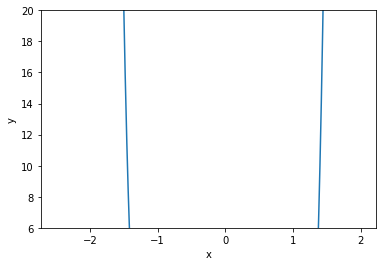

In [153]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([6, 20])

plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_a)

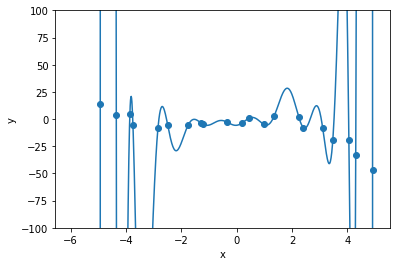

In [154]:
x_mat = createMat(data[0])
y = data[1]

a = np.linalg.solve(x_mat, y)
x_list = np.linspace(-6, 5, 901)
y_a = createY(a, x_list)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-100, 100])

plt.scatter(data[0], data[1])
plt.plot(x_list, y_a)

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

In [155]:
def PolynomialModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k]*x**k
    return t

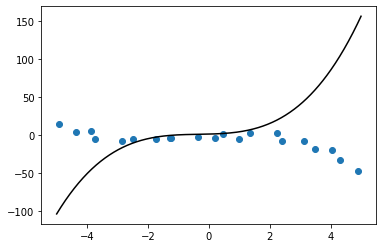

In [234]:
# 15 + 2.4*x - 0.5*x**2 - 0.35*x**3
# a0 = np.array([-2, 2.4, -0.5, -0.35])
a0 = np.array([1, 1, 1, 1])

x_list = np.linspace(-5, 5, 901)
plt.scatter(data[0], data[1])
plt.plot(x_list, PolynomialModel(x_list, a0), 'black')

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

In [235]:
def errorFit(f, a, data):
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1, i] - f(data[0, i], a))**2
        # print(error)
    return error

In [236]:
errorFit(PolynomialModel, a0, data)

100645.1380059351

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

In [237]:
def gradak(f, a, data, k):
    grad = 0
    for i in range(len(data[0])):
        grad = grad + (data[1, i] - f(data[0, i], a)) * data[0, i]**k
    return -2*grad

### 2.3.4 Loop for the actual fitting

In [293]:
def getCoeff(f, a, data):
    initgrad = np.inf
    grada = np.zeros(len(a))
    h = 0.00001
    iterations = 100000
    # while 0 < 1:
    for i in range(iterations):
        for k in range(len(a)):
            grada[k] = gradak(PolynomialModel, a, data, k)
        if np.linalg.norm(grada) < initgrad:
            a = a - grada*h
            initgrad = np.linalg.norm(grada)
        else:
            break
    print(a)
    return a

In [294]:
a0 = 2*np.random.rand(len(a)) - 1

a = getCoeff(PolynomialModel, a0, data)

[-1.61606225  2.69620422 -0.61988571 -0.36586657]


- Comparison of a and a0

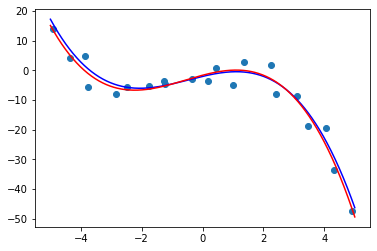

In [295]:
a0 = np.array([-2, 2.4, -0.5, -0.35])

x_list = np.linspace(-5, 5, 901)
plt.scatter(data[0], data[1])
plt.plot(x_list, PolynomialModel(x_list, a0), 'blue')
plt.plot(x_list, PolynomialModel(x_list, a), 'red')

In [297]:
print(errorFit(PolynomialModel, a, data))
print(errorFit(PolynomialModel, a0, data))

193.01495437923668
223.8796411099665
